In [1]:
%pip install tf_keras_vis tflite-support-nightly

Note: you may need to restart the kernel to use updated packages.


# Create your dataset

1) Choose which classes you would like to add.

2) Create a dataset with your own photos

3) Separate your dataset into train and test subsets.

In [2]:
import os
import pandas as pd
from glob import glob

def create_dataframe_from_directories(path):
    data = []

    for label_dir in os.listdir(path):
        if os.path.isfile(label_dir):
            continue

        label_path_path = os.path.join(path, label_dir)
        for file in os.listdir(label_path_path):
            data.append([os.path.join(label_path_path, file), label_dir])
        
    return pd.DataFrame(data, columns = ["path", "label"])

In [3]:
train_df = create_dataframe_from_directories("dataset_train")
#test_df = create_dataframe_from_directories("dataset_test")

In [4]:
LABEL_NAMES = pd.unique(train_df['label'])
print(LABEL_NAMES)
train_df

['noisette' 'pecan' 'cajoux']


path     label
0    dataset_train/noisette/IMG_20220603_104746.jpg  noisette
1    dataset_train/noisette/IMG_20220603_105149.jpg  noisette
2    dataset_train/noisette/IMG_20220603_105447.jpg  noisette
3    dataset_train/noisette/IMG_20220610_104451.jpg  noisette
4    dataset_train/noisette/IMG_20220603_111654.jpg  noisette
..                                              ...       ...
583    dataset_train/cajoux/IMG_20220603_101226.jpg    cajoux
584    dataset_train/cajoux/IMG_20220603_101331.jpg    cajoux
585    dataset_train/cajoux/IMG_20220603_100754.jpg    cajoux
586    dataset_train/cajoux/IMG_20220603_111457.jpg    cajoux
587    dataset_train/cajoux/IMG_20220603_104723.jpg    cajoux

[588 rows x 2 columns]

**TODO**: Display some images of your dataset

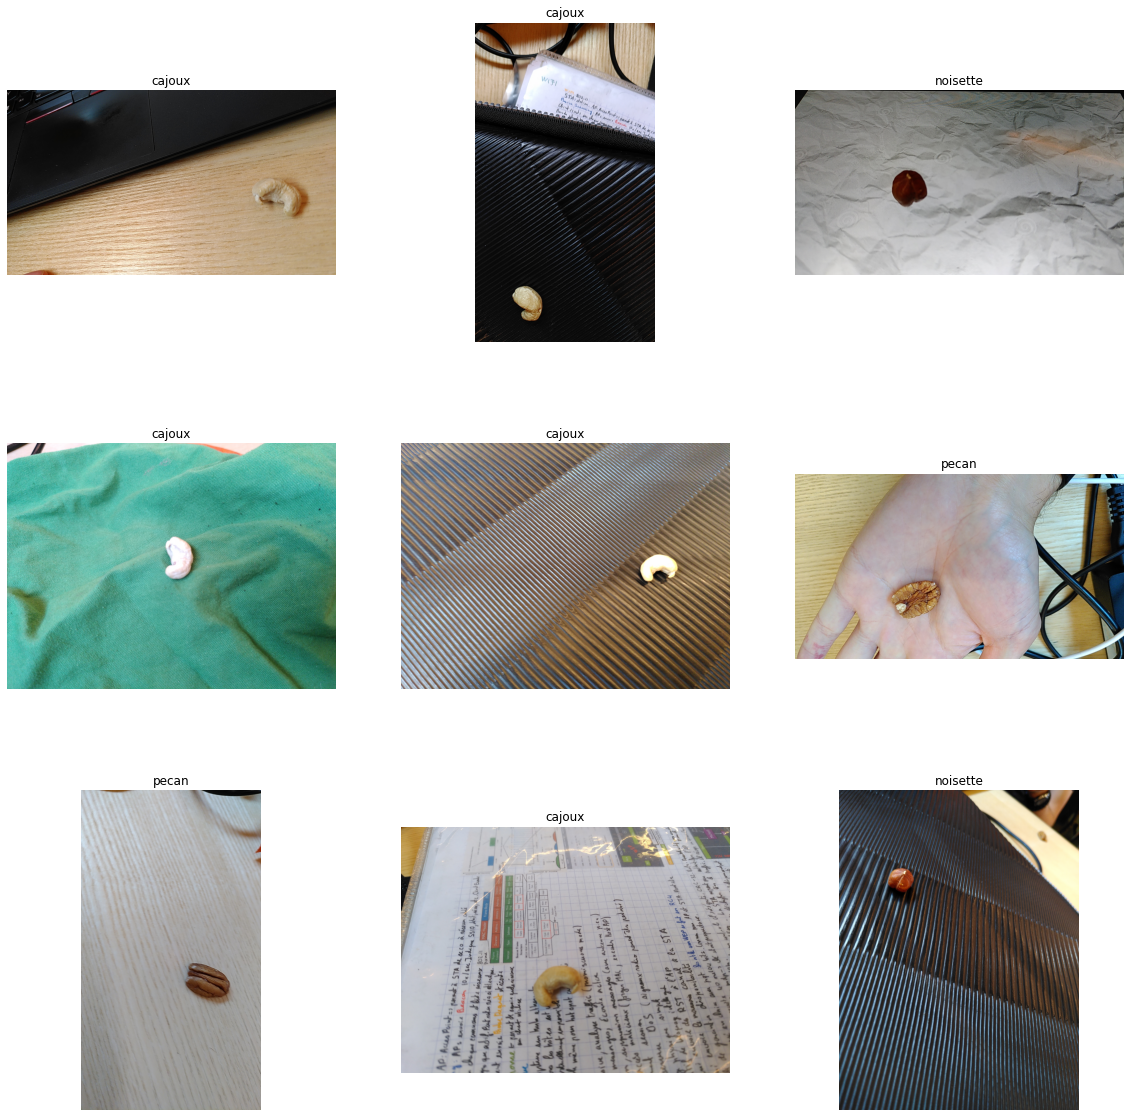

In [5]:
import matplotlib.pyplot as plt
import PIL
import PIL.Image
 
plt.figure(figsize=(20, 20))

i = 0
for _, rowdata in train_df.sample(frac=1).head(9).iterrows():
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(PIL.Image.open(rowdata.path))
    plt.title(rowdata.label)
    plt.axis("off")
    i += 1

# Explore your dataset

**TODO**: count the number of examples per classes and plot an histogram of it

[Text(0, 0, '205.0'),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, '170.0'),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, '213.0')]

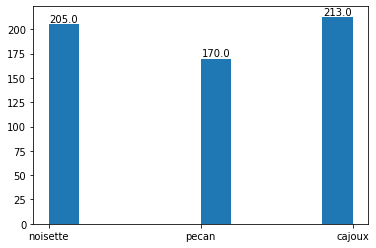

In [6]:
count, edge, bars = plt.hist(train_df['label'])
plt.bar_label(bars, labels=[v if v > 0 else '' for v in bars.datavalues])

# Preprocessing steps

In [7]:
from tensorflow.keras.layers import (
    Resizing, Rescaling,
)
import tensorflow as tf
import numpy as np
from tensorflow.keras import Sequential
from tensorflow.keras import layers

IMG_HEIGHT = 224
IMG_WIDTH = 224

image_preprocesses = Sequential([
    Resizing(IMG_HEIGHT, IMG_WIDTH, crop_to_aspect_ratio=True),
    Rescaling(1. / 255)
])

image_augmentations = Sequential([
    # TODO: choose some image augmentations layers
    # see which keras layers you can use
    # The kind of layers you will want to use starts with "Random".
    # See the following page for more information on data augmentation :
    # https://www.tensorflow.org/tutorials/images/data_augmentation
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomZoom((-0.05,0.1), width_factor=(-0.05,0.1)),
    layers.RandomRotation(0.1),
    layers.RandomContrast(0.1),
])

def open_images(paths):
    return np.stack([
        open_image(path) for path in paths
    ])

def open_image(path):
    with PIL.Image.open(path) as image:
        opened_img = image_preprocesses(np.asarray(image))
    
    return opened_img

def augment_images(images):
    return np.stack([
        image_augmentations(img) for img in images
    ])

2022-06-14 14:25:51.045992: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-06-14 14:25:51.046027: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-06-14 14:25:54.098816: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-06-14 14:25:54.098851: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-06-14 14:25:54.098877: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (Ancalagon): /proc/driver/nvidia/version does not exist
2022-06-14 14:25:54.099104: I tensorflow/core/platform/cpu_feature_

**TODO**: plot examples of preprocessed and augmented images

['dataset_train/pecan/IMG_20220603_112529.jpg', 'dataset_train/cajoux/imago0103465089s.jpg', 'dataset_train/cajoux/IMG_20220603_111529.jpg', 'dataset_train/pecan/IMG_20220603_101543.jpg', 'dataset_train/pecan/IMG_20220603_112453.jpg', 'dataset_train/pecan/IMG_20220603_112327.jpg', 'dataset_train/pecan/IMG_20220603_101306.jpg', 'dataset_train/noisette/IMG_20220603_111849.jpg', 'dataset_train/pecan/IMG_20220603_101456.jpg']


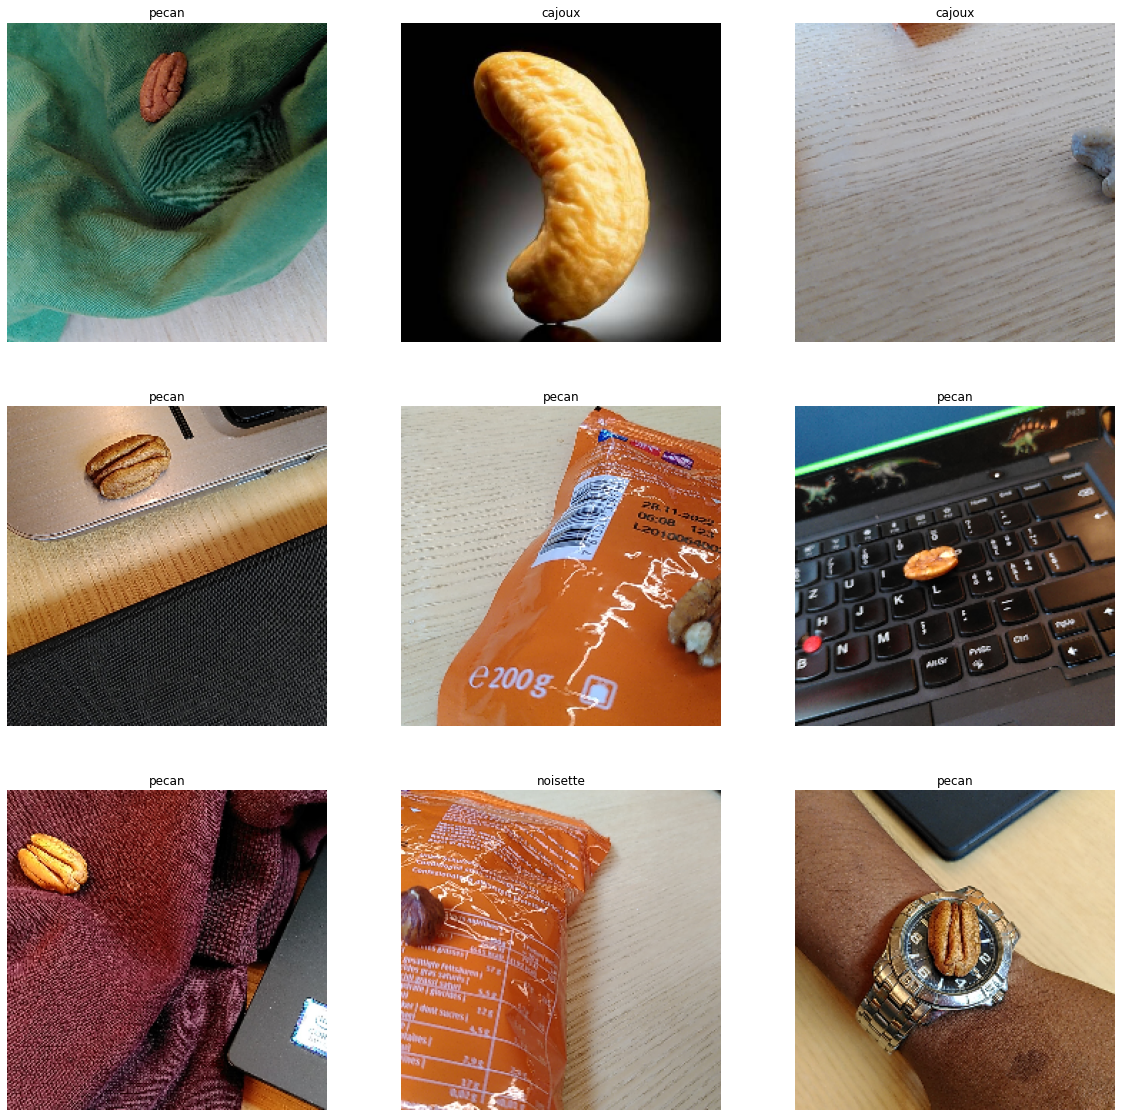

In [8]:
plt.figure(figsize=(20, 20))
sample = train_df.sample(frac=1).head(9).iterrows()
i = 0
images = []
for _, rowdata in train_df.sample(frac=1).head(9).iterrows():
    ax = plt.subplot(3, 3, i + 1)
    images.append(rowdata.path)
    plt.imshow(open_image(rowdata.path))
    plt.title(rowdata.label)
    plt.axis("off")
    i += 1
print(images)

Data augmentation

In [9]:
#print(train_df)
#augmented_data = []
#i = 0
#for item in train_df.path:
#    print(item)
#    for i in range(2):
#        augmented_data.append([image_augmentations(open_image(item)), train_df.label[i]])
#    i += 1
#augmented_df = pd.DataFrame(augmented_data, columns = ["image", "label"])
#tmp = augment_images(open_images(train_df.path))
#for _, rowdata in train_df.sample(frac=1).iterrows():
#    tmp = image_augmentations(open_image(rowdata.path))
    

In [10]:
#print(len(augmented_df))

In [11]:
#plt.figure(figsize=(20, 20))
#i = 0
#for im in images:
#    ax = plt.subplot(3, 3, i + 1)
#    plt.imshow(im)
#    plt.title(rowdata.label)
#    plt.axis("off")
#    i += 1
#    if i == 8:
#        break

In [12]:
#images = open_images(images)
#plt.figure(figsize=(20, 20))
#i = 0
#for im in images:
#    ax = plt.subplot(3, 3, i + 1)
#    plt.imshow(image_augmentations(im))
#    plt.title(rowdata.label)
#    plt.axis("off")
#    i += 1

In [13]:
#plt.figure(figsize=(20, 20))
#i = 0
#for _, rowdata in augmented_df.sample(frac=1).head(9).iterrows():
#    ax = plt.subplot(3, 3, i + 1)
#    plt.imshow(rowdata.image)
#    plt.title(rowdata.label)
#    plt.axis("off")
#    i += 1

## Define model

In [14]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras import Model
from tensorflow.keras.layers import (
    GlobalAveragePooling2D,
    Dense,
    Dropout
)

def get_model():
    base_model = MobileNetV2(
        input_shape=(224, 224, 3),
        weights='imagenet',
        include_top=False
    )
    
    layers = base_model.output

    added_layers = [
        # important, we need global average pooling instead of flatten for class activation map later on 
        GlobalAveragePooling2D(), 
        # TODO: ...
        Dense(16, activation='relu'),
        Dense(16, activation='relu'),
        Dropout(0.4),
        Dense(len(LABEL_NAMES), activation='softmax')
    ]

    model = Model(inputs=base_model.input, outputs=Sequential(added_layers)(layers))
    # TODO: freeze layers
    for layer in model.layers[:-2]:
        layer.trainable=False
    for layer in model.layers[-2:]:
        layer.trainable=True
    
    model.compile(
      optimizer = RMSprop(),
      loss = SparseCategoricalCrossentropy(),
      metrics = ['acc']
    )
        
    return model

In [15]:
model = get_model()
get_model().summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                                           

 block_3_expand_relu (ReLU)     (None, 56, 56, 144)  0           ['block_3_expand_BN[0][0]']      
                                                                                                  
 block_3_pad (ZeroPadding2D)    (None, 57, 57, 144)  0           ['block_3_expand_relu[0][0]']    
                                                                                                  
 block_3_depthwise (DepthwiseCo  (None, 28, 28, 144)  1296       ['block_3_pad[0][0]']            
 nv2D)                                                                                            
                                                                                                  
 block_3_depthwise_BN (BatchNor  (None, 28, 28, 144)  576        ['block_3_depthwise[0][0]']      
 malization)                                                                                      
                                                                                                  
 block_3_d

 lization)                                                                                        
                                                                                                  
 block_7_expand (Conv2D)        (None, 14, 14, 384)  24576       ['block_6_project_BN[0][0]']     
                                                                                                  
 block_7_expand_BN (BatchNormal  (None, 14, 14, 384)  1536       ['block_7_expand[0][0]']         
 ization)                                                                                         
                                                                                                  
 block_7_expand_relu (ReLU)     (None, 14, 14, 384)  0           ['block_7_expand_BN[0][0]']      
                                                                                                  
 block_7_depthwise (DepthwiseCo  (None, 14, 14, 384)  3456       ['block_7_expand_relu[0][0]']    
 nv2D)    

                                                                                                  
 block_10_depthwise_relu (ReLU)  (None, 14, 14, 384)  0          ['block_10_depthwise_BN[0][0]']  
                                                                                                  
 block_10_project (Conv2D)      (None, 14, 14, 96)   36864       ['block_10_depthwise_relu[0][0]']
                                                                                                  
 block_10_project_BN (BatchNorm  (None, 14, 14, 96)  384         ['block_10_project[0][0]']       
 alization)                                                                                       
                                                                                                  
 block_11_expand (Conv2D)       (None, 14, 14, 576)  55296       ['block_10_project_BN[0][0]']    
                                                                                                  
 block_11_

 block_14_depthwise (DepthwiseC  (None, 7, 7, 960)   8640        ['block_14_expand_relu[0][0]']   
 onv2D)                                                                                           
                                                                                                  
 block_14_depthwise_BN (BatchNo  (None, 7, 7, 960)   3840        ['block_14_depthwise[0][0]']     
 rmalization)                                                                                     
                                                                                                  
 block_14_depthwise_relu (ReLU)  (None, 7, 7, 960)   0           ['block_14_depthwise_BN[0][0]']  
                                                                                                  
 block_14_project (Conv2D)      (None, 7, 7, 160)    153600      ['block_14_depthwise_relu[0][0]']
                                                                                                  
 block_14_

# Model training

**TODO**: cross-validate your model, you can base yourself on the code from the first part of this practical work

**NOTE**: you shouldn't augment validations images. What we want to evaluate is the performances on "real" images, not on images that are augmented and change all the time 

In [ ]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

dataframe = pd.DataFrame(train_df, columns = ["path", "label"])
shuffled_dataset = dataframe.sample(frac=1, random_state=1234).reset_index(drop=True)

dataset_paths = shuffled_dataset['path'].to_numpy()
dataset_labels = shuffled_dataset['label'].to_numpy()

total_train_paths, test_paths, total_train_labels, test_labels = train_test_split(
    dataset_paths, dataset_labels, test_size=0.2, random_state=1234
)

#dataframe_test = pd.DataFrame(test_df, columns = ["path", "label"])
#shuffeled_dataset_test = dataframe_test.sample(frac=1, random_state=1234).reset_index(drop=True)

#test_paths = shuffeled_dataset_test["path"].to_numpy()
#test_labels = shuffeled_dataset_test["label"].to_numpy()

#total_train_paths = dataset_paths
#total_train_labels = dataset_labels

# We need to convert from string labels to integers
label_encoder = LabelEncoder()
label_encoder.fit(dataset_labels)
total_train_labels = label_encoder.transform(total_train_labels)
test_labels = label_encoder.transform(test_labels)

NB_EPOCHS = 8

train_losses = []
train_accuracies = []
val_losses = []
val_accuracies = []

for train_index, val_index in KFold(n_splits=5).split(total_train_paths, total_train_labels):
    train_images = augment_images(open_images(total_train_paths[train_index]))    
    train_labels = total_train_labels[train_index]
    
    val_images = augment_images(open_images(total_train_paths[val_index]))
    val_labels = total_train_labels[val_index]
    
    model = get_model() # We reinitialize the model
    
    history = model.fit(
        x=train_images,
        y=train_labels,
        batch_size=32,
        validation_data=[val_images, val_labels],
        epochs=NB_EPOCHS,
    )
    
    train_losses.append(history.history['loss'])
    val_losses.append(history.history['val_loss'])
    train_accuracies.append(history.history['acc'])
    val_accuracies.append(history.history['val_acc'])

Epoch 1/8
12/12 [==============================] - 14s 972ms/step - loss: 1.1095 - acc: 0.4016 - val_loss: 1.0021 - val_acc: 0.4043
Epoch 2/8
12/12 [==============================] - 11s 905ms/step - loss: 0.9775 - acc: 0.4973 - val_loss: 0.8470 - val_acc: 0.6809
Epoch 3/8
12/12 [==============================] - 11s 895ms/step - loss: 0.8334 - acc: 0.6250 - val_loss: 0.7022 - val_acc: 0.7872
Epoch 4/8
12/12 [==============================] - 11s 935ms/step - loss: 0.6972 - acc: 0.7234 - val_loss: 0.5864 - val_acc: 0.7979
Epoch 5/8
12/12 [==============================] - 11s 948ms/step - loss: 0.5964 - acc: 0.7340 - val_loss: 0.5819 - val_acc: 0.8191
Epoch 6/8
12/12 [==============================] - 11s 920ms/step - loss: 0.5510 - acc: 0.7739 - val_loss: 0.4539 - val_acc: 0.8191
Epoch 7/8
12/12 [==============================] - 11s 910ms/step - loss: 0.4781 - acc: 0.8165 - val_loss: 0.4016 - val_acc: 0.8723
Epoch 8/8
12/12 [==============================] - 11s 911ms/step - loss: 0.

# Results

**TODO**: plot the results from your crossvalidation

In [ ]:
def plot_kfold_mean_performance(ax, train_performances, val_performances, measure_name):
    train_mean = np.mean(train_performances, axis=0)
    val_mean = np.mean(val_performances, axis=0)
    train_sd = np.std(train_performances, axis=0)
    val_sd = np.std(val_performances, axis=0)
    
    ax.fill_between(np.arange(NB_EPOCHS), train_mean, train_mean+train_sd, facecolor='blue', alpha=0.5, label='Train')
    ax.fill_between(np.arange(NB_EPOCHS), train_mean, train_mean-train_sd, facecolor='blue', alpha=0.5)

    ax.fill_between(np.arange(NB_EPOCHS), val_mean, val_mean+val_sd, facecolor='orange', alpha=0.5, label='Val')
    ax.fill_between(np.arange(NB_EPOCHS), val_mean, val_mean-val_sd, facecolor='orange', alpha=0.5)

    ax.set_xticks(np.arange(NB_EPOCHS))

    ax.set_ylabel(measure_name)
    ax.set_xlabel('Number of epochs')
    #pl.title(str(K)+'-fold CV with '+str(n)+' hidden neurons')
    ax.legend()
    ax.grid()

In [ ]:
import matplotlib.pyplot as pl

fig, axs = plt.subplots(2, 1, constrained_layout=True, figsize=(12,6))

plot_kfold_mean_performance(axs[0], train_losses, val_losses, "Loss")
plot_kfold_mean_performance(axs[1], train_accuracies, val_accuracies, "Accuracy")

## Evaluate model on test set

**TODO**: when you've selected a final model, evaluate its performances (f-score, confusion matrix, ...) on your test set

In [ ]:
import sklearn.metrics as me

test_images = open_images(test_paths)    

pred = model.predict(test_images)
pred = np.argmax(pred, axis=-1)

test_confusion_matrix = me.confusion_matrix(test_labels, pred, labels=np.arange(len(LABEL_NAMES)))

In [ ]:
confusion_matrix_display = me.ConfusionMatrixDisplay(
    confusion_matrix=test_confusion_matrix,
    display_labels=LABEL_NAMES,
)

confusion_matrix_display.plot(xticks_rotation='vertical')
plt.show()

### Display some misclassified images

**TODO**: display some misclassified images to be able to see what images are difficult for the model

In [ ]:
from math import *
images = test_images[test_labels != pred]
plt.figure(figsize=(20, 20))
i = 0
for im in images:
    ax = plt.subplot(ceil(sqrt(len(images))), ceil(sqrt(len(images))), i + 1)
    plt.imshow(im)
    plt.title(LABEL_NAMES[pred[i]])
    plt.axis("off")
    i += 1

## Use grad-cam to inspect how the model classify
Here we can see an heatmap of the regions that activates the model the most.

### For more information:
- tf-keras-vis documentation: https://keisen.github.io/tf-keras-vis-docs/
- Grad-cam paper: https://arxiv.org/pdf/1610.02391.pdf
- Grad-cam++ paper: https://arxiv.org/pdf/1710.11063.pdf

**NOTE**: maybe you will need to adapt some variable names based on your code above. For example, _model_ should be the model trained on all the training data. 

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import cm
from tensorflow.keras.applications import MobileNetV2
from tf_keras_vis.gradcam_plus_plus import GradcamPlusPlus
from tf_keras_vis.utils.model_modifiers import ReplaceToLinear
from tf_keras_vis.utils.scores import CategoricalScore

# Create GradCAM++ object
gradcam = GradcamPlusPlus(
    model,
    model_modifier=ReplaceToLinear(),
    clone=True,
)

nb_images_per_class = 10

fig, axs = plt.subplots(nb_images_per_class, len(LABEL_NAMES), figsize=(len(LABEL_NAMES) * 5, nb_images_per_class * 5))

for label_idx, label_name in enumerate(LABEL_NAMES):
    axs[0,label_idx].set_title(label_name, loc='center', y=1.1)
    
    i = 0
    for _, rowdata in train_df[train_df['label'] == label_name].sample(frac=1).head(nb_images_per_class).iterrows():
        img = open_image(rowdata.path)    
        pred = model(np.expand_dims(img, axis=0))

        # Generate cam with GradCAM++
        score = CategoricalScore(np.argmax(pred))
        cam = gradcam(score, img)
        heatmap = np.uint8(cm.jet(cam[0])[..., :3] * 255)

        axs[i,label_idx].imshow(img, vmin=0, vmax=1)
        axs[i,label_idx].imshow(heatmap, cmap='jet', alpha=0.5) # overlay
        axs[i,label_idx].axis("off")

        i += 1

### Grad-cam on misclassified images

**TODO**: now do the same than above, but with the misclassified images. You shouldn't change anything pertaining to grad-cam besides on which image and prediction you do it

**TODO**: try to determine what caused the misclassifcations and what you can do about it

In [ ]:

# Create GradCAM++ object
gradcam = GradcamPlusPlus(
    model,
    model_modifier=ReplaceToLinear(),
    clone=True,
)

nb_images_per_class = 10

fig, axs = plt.subplots(nb_images_per_class, len(LABEL_NAMES), figsize=(len(LABEL_NAMES) * 5, nb_images_per_class * 5))

for label_idx, label_name in enumerate(LABEL_NAMES):
    axs[0,label_idx].set_title(label_name, loc='center', y=1.1)
    
    i = 0
    for _, rowdata in train_df[train_df['label'] != label_name].sample(frac=1).head(nb_images_per_class).iterrows():
        img = open_image(rowdata.path)    
        pred = model(np.expand_dims(img, axis=0))

        # Generate cam with GradCAM++
        score = CategoricalScore(np.argmax(pred))
        cam = gradcam(score, img)
        heatmap = np.uint8(cm.jet(cam[0])[..., :3] * 255)

        axs[i,label_idx].imshow(img, vmin=0, vmax=1)
        axs[i,label_idx].imshow(heatmap, cmap='jet', alpha=0.5) # overlay
        axs[i,label_idx].axis("off")

        i += 1

In [ ]:
import tensorflow as tf
from tflite_support.metadata_writers import image_classifier
from tflite_support.metadata_writers import writer_utils

# Task Library expects label files that are in the same format as the one below.
LABEL_FILE = "labels.txt"
SAVE_TO_PATH = "MyModel.tflite"

# Create the labels file
with open(LABEL_FILE, 'w') as label_file:
    for label in LABEL_NAMES: # /!\ class_names variable must contains the names of the labels you have.
        label_file.write("{}\n".format(label))

tflite_model = tf.lite.TFLiteConverter.from_keras_model(model).convert()

# Save the model.
with open(SAVE_TO_PATH, 'wb') as f:
    f.write(tflite_model)
    
ImageClassifierWriter = image_classifier.MetadataWriter

# Normalization parameters is required when reprocessing the image. It is
# optional if the image pixel values are in range of [0, 255] and the input
# tensor is quantized to uint8. See the introduction for normalization and
# quantization parameters below for more details.
# https://www.tensorflow.org/lite/convert/metadata#normalization_and_quantization_parameters)
INPUT_NORM_MEAN = 127.5
INPUT_NORM_STD = 127.5

# Create the metadata writer.
writer = ImageClassifierWriter.create_for_inference(
    writer_utils.load_file(SAVE_TO_PATH),
    [INPUT_NORM_MEAN],
    [INPUT_NORM_STD],
    [LABEL_FILE]
)

# Verify the metadata generated by metadata writer.
print(writer.get_metadata_json())

# Populate the metadata into the model.
writer_utils.save_file(writer.populate(), SAVE_TO_PATH)